Bibliotecas

In [59]:
!python310.exe -m pip install --upgrade pip
%pip install yfinance
%pip install vectorbt
%pip install sweetviz
%pip install numpy
%pip install pandas
%pip install scipy
%pip install sklearn
%pip install statsmodels
%pip install yfinance
%pip install seaborn
%pip install plotly
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
import numpy as np
import pandas as pd

from scipy import stats
import pylab
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import yfinance as yf
import vectorbt as vbt

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import sweetviz as sv
import matplotlib.pyplot as plt

In [13]:
np.random.seed(13)
a = np.random.randint(50, size = 30)
b = np.random.randint(50, size = 30)
ab = zip(a,b)
fig = px.scatter(ab, x=a, y=b, template='simple_white', width=400, height=400)
fig.update_layout(paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))

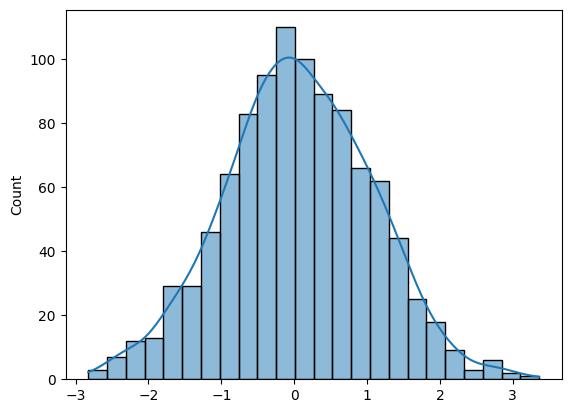

In [32]:
normal_dist = np.random.normal(0, 1, 1000)
normal_fig01 = sns.histplot(normal_dist, kde=True)

Medidas de Posição

In [33]:
print(np.mean(normal_dist))
print(np.median(normal_dist))
print(stats.mode(normal_dist))

0.055407265094163397
0.04529663322728387
ModeResult(mode=-2.826669095366381, count=1)


In [34]:
print(round(np.mean(normal_dist), 2))
print(round(np.median(normal_dist), 2))

0.06
0.05


In [35]:
fig01 = px.histogram(normal_dist, color_discrete_sequence=['lightseagreen'])
fig01.add_vline(x=np.mean(normal_dist), line_width=3,  line_color="red")
fig01.add_vline(x=np.median(normal_dist), line_width=3, line_dash="dash", line_color="red")
fig01.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

Testes de Normalidade

In [50]:
#pvalue > 0.05 são normais
teste_normalidade = stats.normaltest(normal_dist)
print(teste_normalidade)

NormaltestResult(statistic=0.02321352432077541, pvalue=0.9884603364534212)


In [51]:
normal_dist2 = normal_dist.copy()
normal_dist2 = normal_dist2.tolist()
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
normal_dist2.extend(normal_dist2)
teste_normalidade2 = stats.normaltest(normal_dist2)
print(teste_normalidade2)

NormaltestResult(statistic=8.291082582994285, pvalue=0.015834862354771932)


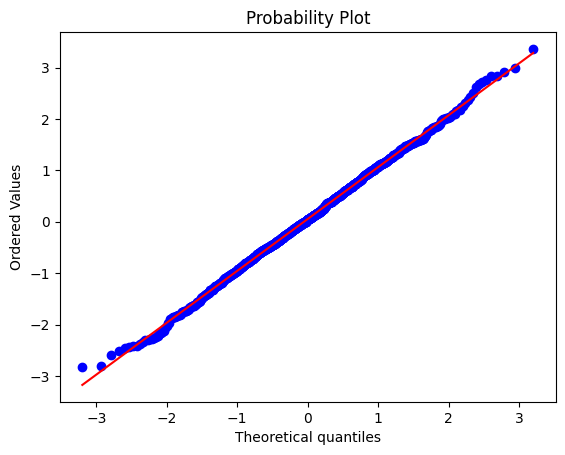

In [64]:
stats.probplot(normal_dist, dist="norm", plot=plt)
plt.show()

In [65]:
fig02 = go.Figure()
fig02.add_trace(go.Box(y=normal_dist, boxpoints='all', boxmean='sd', name='<b>Normal distribution', marker_color = 'blue'))
fig02.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

In [66]:
print(np.quantile(normal_dist, 0.25))
print(np.percentile(normal_dist, 25))

-0.5948922253621612
-0.5948922253621612


In [67]:
df_normal_distrib = pd.DataFrame(normal_dist)
df_normal_distrib.describe()

,0
count,1000.000000
mean,0.055407
std,1.007717
min,-2.826669
25%,-0.594892
50%,0.045297
75%,0.735541
max,3.361481


In [68]:
stats.skew(normal_dist)

0.005794145897652341

In [69]:
# Amplitude para alvos/stops
amplitude = normal_dist.max() - normal_dist.min()
amplitude

6.188150193317397

In [70]:
# Desvio padrão da amostra (população degrees of freedom = False)
# Sharpe ratio, bandas de bollinger
desvio_padrao = np.std(normal_dist, ddof = True)
desvio_padrao

1.0077170253944852

In [71]:
# Coeficiente de variação
# Interessante para comparações e avaliar a consistência (ex., pagamento de dividendos)
normal_dist.std(ddof = True)/normal_dist.mean()*100

1818.7452921235017

In [76]:
# Erro padrão da média

stats.sem(normal_dist)

0.031866810371763116

In [80]:
# Intervalo de confiança 95%
# Probabilidade de 95% da média real estar nesse intervalo

IC_95 = stats.t.interval(0.95, df=len(normal_dist)-1, loc=np.mean(normal_dist), scale=stats.sem(normal_dist))
IC_95

(-0.007126298132424769, 0.11794082832075156)